In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv


In [163]:
import pandas as pd

# 2. Data Loading and Exploration
df = pd.read_csv('/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv')

df = df[['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']]
print("First 5 records:")
print(df.tail())
print('Print all the null values')
print(df.isnull().sum())

First 5 records:
              date  location  total_cases  total_deaths  new_cases  \
350080  2023-10-14  Zimbabwe     265808.0        5718.0        0.0   
350081  2023-10-15  Zimbabwe     265808.0        5718.0        0.0   
350082  2023-10-16  Zimbabwe     265808.0        5718.0        0.0   
350083  2023-10-17  Zimbabwe     265808.0        5718.0        0.0   
350084  2023-10-18  Zimbabwe     265808.0        5718.0        0.0   

        new_deaths  total_vaccinations  
350080         0.0                 NaN  
350081         0.0                 NaN  
350082         0.0                 NaN  
350083         0.0                 NaN  
350084         0.0                 NaN  
Print all the null values
date                       0
location                   0
total_cases            37997
total_deaths           59584
new_cases               9628
new_deaths              9574
total_vaccinations    270777
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [164]:
# 3. Data Loading & Exploration
# 3a. Filter countries of interest (Kenya, USA, India)
countries = ['Kenya', 'India','United States']
df = df[df['location'].isin(countries)]
# 3b. Drop rows with missing critical values (e.g., date, new_cases, new_deaths)
print(df.columns.tolist())
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(df)

['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
              date       location  total_cases  total_deaths  new_cases  \
139773  2020-01-03          India          NaN           NaN        0.0   
139774  2020-01-04          India          NaN           NaN        0.0   
139775  2020-01-05          India          NaN           NaN        0.0   
139776  2020-01-06          India          NaN           NaN        0.0   
139777  2020-01-07          India          NaN           NaN        0.0   
...            ...            ...          ...           ...        ...   
330861  2023-10-14  United States  103436829.0     1136920.0        NaN   
330862  2023-10-15  United States  103436829.0     1136920.0        NaN   
330863  2023-10-16  United States  103436829.0     1136920.0        NaN   
330864  2023-10-17  United States  103436829.0     1136920.0        NaN   
330865  2023-10-18  United States  103436829.0     1136920.0        NaN   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [165]:
df = df.sort_values(by=['location', 'date'])  # Sort before interpolation
df['total_cases'] = df.groupby('location')['total_cases'].transform(lambda x: x.interpolate())
print(df)

              date       location  total_cases  total_deaths  new_cases  \
139773  2020-01-03          India          NaN           NaN        0.0   
139774  2020-01-04          India          NaN           NaN        0.0   
139775  2020-01-05          India          NaN           NaN        0.0   
139776  2020-01-06          India          NaN           NaN        0.0   
139777  2020-01-07          India          NaN           NaN        0.0   
...            ...            ...          ...           ...        ...   
330861  2023-10-14  United States  103436829.0     1136920.0        NaN   
330862  2023-10-15  United States  103436829.0     1136920.0        NaN   
330863  2023-10-16  United States  103436829.0     1136920.0        NaN   
330864  2023-10-17  United States  103436829.0     1136920.0        NaN   
330865  2023-10-18  United States  103436829.0     1136920.0        NaN   

        new_deaths  total_vaccinations  
139773         0.0                 NaN  
139774         0.

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [166]:
# 4. Plotting values of the data
grouped_data = df.groupby("location")
mean_total_cases = grouped_data['total_cases'].mean()
print(mean_total_cases)

location
India            2.885780e+07
Kenya            2.264677e+05
United States    5.561495e+07
Name: total_cases, dtype: float64


In [167]:
columns_to_fill = ['total_cases', 'total_deaths', 'new_deaths', 'new_cases', ]

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())
print(df)

              date       location   total_cases  total_deaths     new_cases  \
139773  2020-01-03          India  2.860618e+07  3.676815e+05      0.000000   
139774  2020-01-04          India  2.860618e+07  3.676815e+05      0.000000   
139775  2020-01-05          India  2.860618e+07  3.676815e+05      0.000000   
139776  2020-01-06          India  2.860618e+07  3.676815e+05      0.000000   
139777  2020-01-07          India  2.860618e+07  3.676815e+05      0.000000   
...            ...            ...           ...           ...           ...   
330861  2023-10-14  United States  1.034368e+08  1.136920e+06  37185.996001   
330862  2023-10-15  United States  1.034368e+08  1.136920e+06  37185.996001   
330863  2023-10-16  United States  1.034368e+08  1.136920e+06  37185.996001   
330864  2023-10-17  United States  1.034368e+08  1.136920e+06  37185.996001   
330865  2023-10-18  United States  1.034368e+08  1.136920e+06  37185.996001   

        new_deaths  total_vaccinations  
139773    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [168]:
df['date'] = pd.to_datetime(df['date'])
print(df)

             date       location   total_cases  total_deaths     new_cases  \
139773 2020-01-03          India  2.860618e+07  3.676815e+05      0.000000   
139774 2020-01-04          India  2.860618e+07  3.676815e+05      0.000000   
139775 2020-01-05          India  2.860618e+07  3.676815e+05      0.000000   
139776 2020-01-06          India  2.860618e+07  3.676815e+05      0.000000   
139777 2020-01-07          India  2.860618e+07  3.676815e+05      0.000000   
...           ...            ...           ...           ...           ...   
330861 2023-10-14  United States  1.034368e+08  1.136920e+06  37185.996001   
330862 2023-10-15  United States  1.034368e+08  1.136920e+06  37185.996001   
330863 2023-10-16  United States  1.034368e+08  1.136920e+06  37185.996001   
330864 2023-10-17  United States  1.034368e+08  1.136920e+06  37185.996001   
330865 2023-10-18  United States  1.034368e+08  1.136920e+06  37185.996001   

        new_deaths  total_vaccinations  
139773    0.000000    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


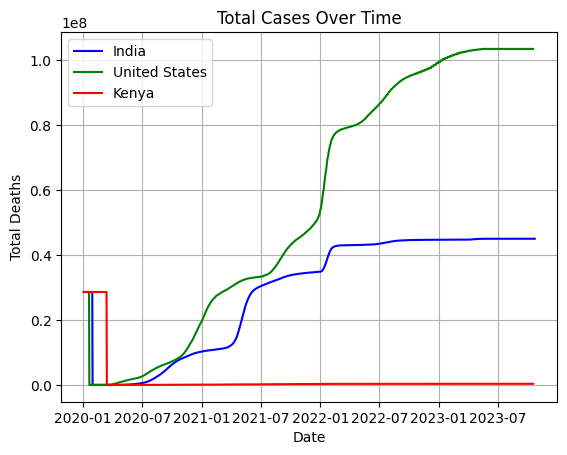

In [169]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt

# Plotting total cases over time for selected countries.
colors = {
    'India': 'blue',
    'United States': 'green',
    'Kenya': 'red'
}

selected_countries = ['India', 'United States', 'Kenya']
df_filtered = df[df['location'].isin(selected_countries)]

for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'],
             label=country, color=colors[country])

# Formatting the plot
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

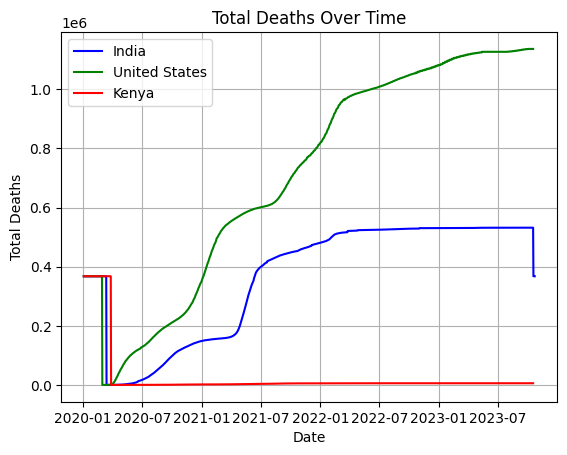

In [170]:
#Plot total deaths over time.
colors = {
    'India': 'blue',
    'United States': 'green',
    'Kenya': 'red'
}

selected_countries = ['India', 'United States', 'Kenya']
df_filtered = df[df['location'].isin(selected_countries)]

for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'],
             label=country, color=colors[country])

# Formatting the plot
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

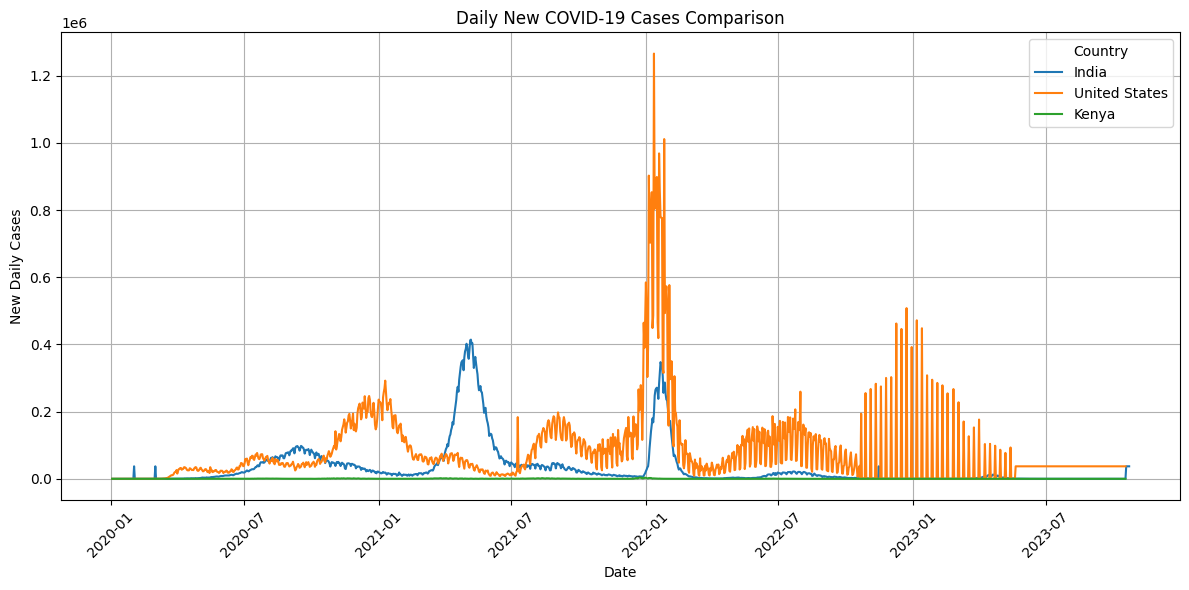

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'date' to datetime format if you haven’t already
df['date'] = pd.to_datetime(df['date'])

# Select countries to compare
selected_countries = ['India', 'United States', 'Kenya']
df_filtered = df[df['location'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))

for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'],
             label=country)

# Add titles and labels
plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Daily Cases')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


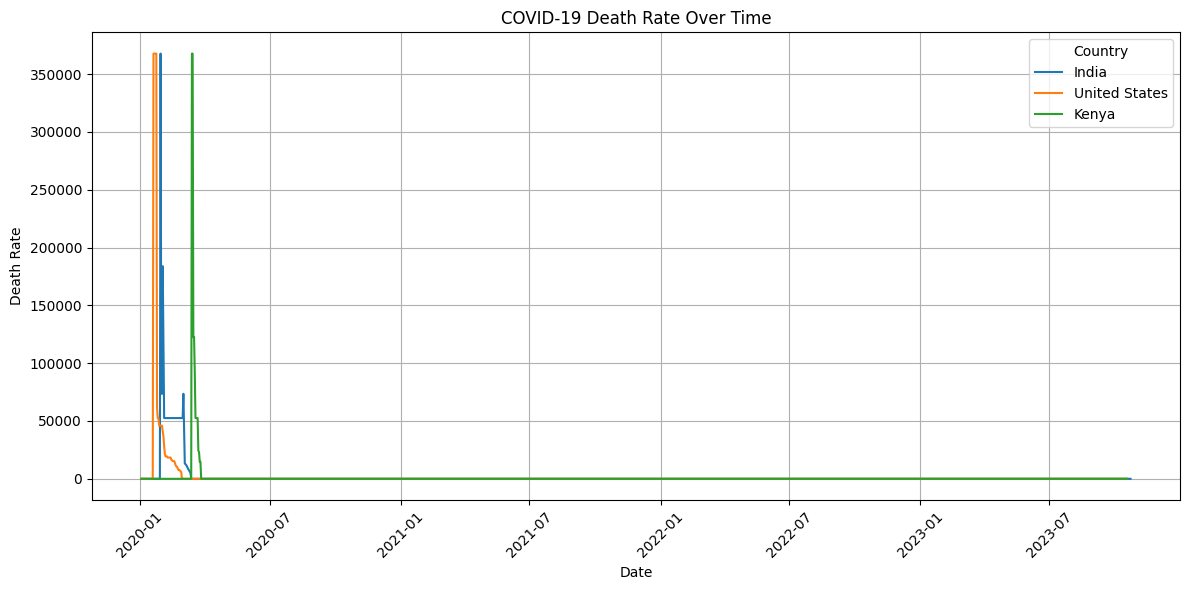

In [172]:
df['death_rate'] = df['total_deaths'].div(df['total_cases']).fillna(0)
plt.figure(figsize=(12, 6))

for country in ['India', 'United States', 'Kenya']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


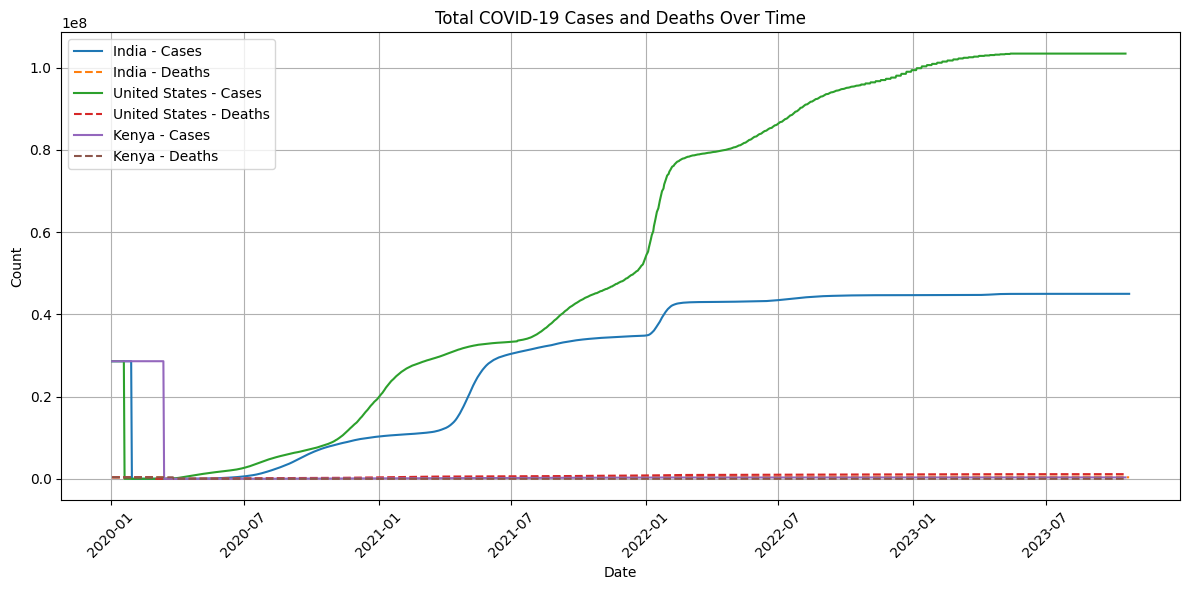

In [173]:
import matplotlib.pyplot as plt

# Filter for selected countries
countries = ['India', 'United States', 'Kenya']
df_filtered = df[df['location'].isin(countries)]

# Plot
plt.figure(figsize=(12, 6))

for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=f'{country} - Cases')
    plt.plot(data['date'], data['total_deaths'], linestyle='--', label=f'{country} - Deaths')

plt.title('Total COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


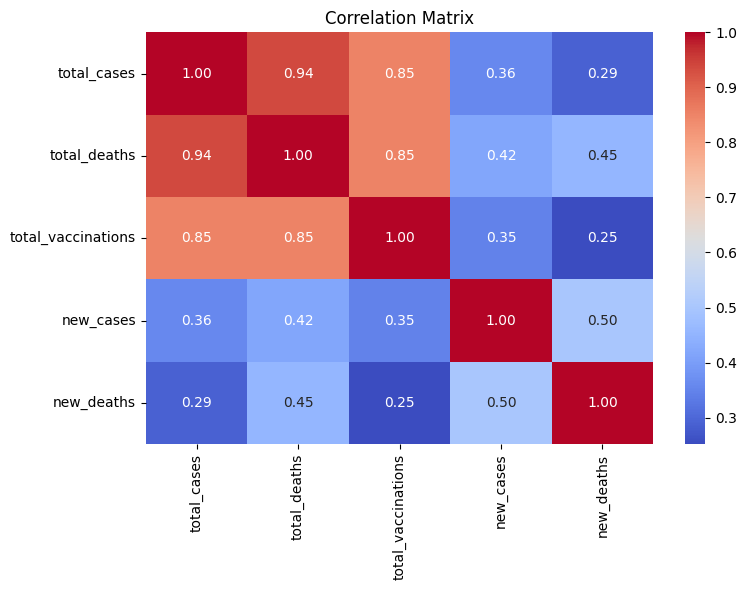

In [177]:
# Select numeric columns of interest
cols_of_interest = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths']
corr = df[cols_of_interest].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


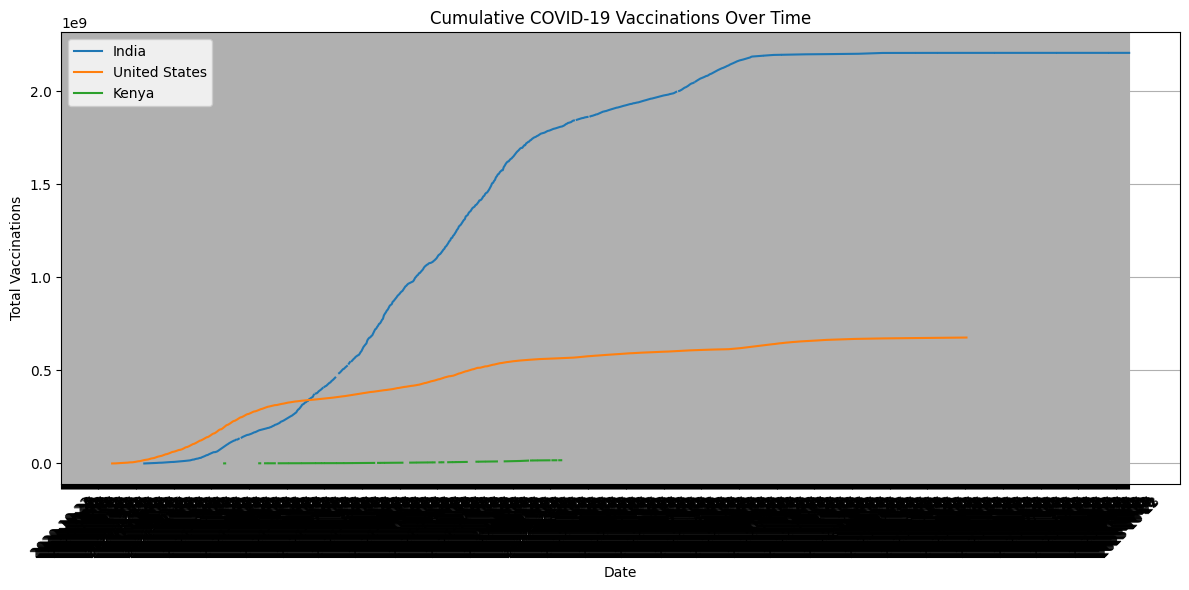

In [178]:
import matplotlib.pyplot as plt

# Selected countries
countries = ['India', 'United States', 'Kenya']
df_vacc = df[df['location'].isin(countries)]

# Plot
plt.figure(figsize=(12, 6))

for country in countries:
    data = df_vacc[df_vacc['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


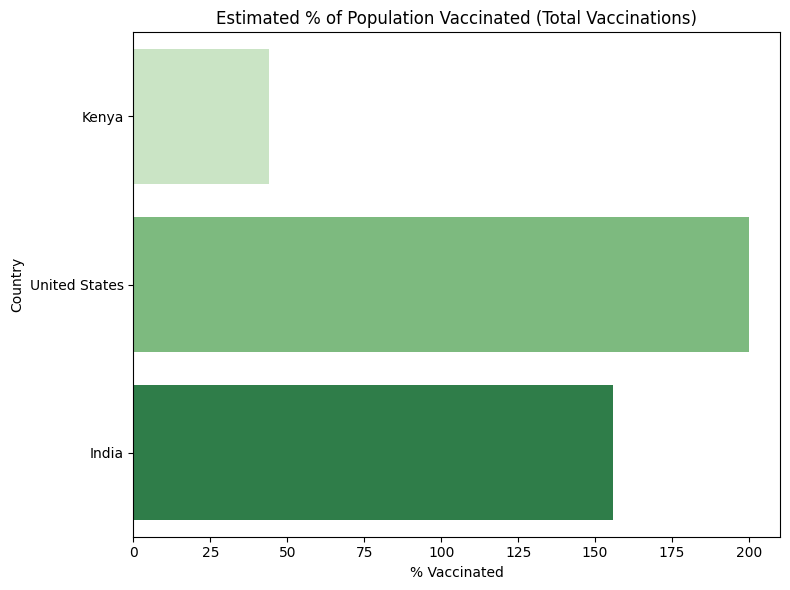

In [179]:
# Cleaned recent data per country
df_sorted = df.sort_values(by='date')

latest_vax = df_sorted[df_sorted['location'].isin(countries)].dropna(subset=['total_vaccinations', 'population'])
latest_vax = latest_vax.groupby('location').tail(1)

# Add vaccination percentage
latest_vax['percent_vaccinated'] = (latest_vax['total_vaccinations'] / latest_vax['population']) * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='percent_vaccinated', y='location', data=latest_vax, palette='Greens')
plt.title('Estimated % of Population Vaccinated (Total Vaccinations)')
plt.xlabel('% Vaccinated')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
